Лабораторная работа №4

Регрессионный анализ данных

Поляков А.В. 20-ИВТ-3

1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

3.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

4.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

6.Заполните пропущенные значения в данных;

7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.
Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Date - Дата (ДД/ММ/ГГГГ). 

Time - Время - (ЧЧ.ММ.СС).

CO(GT) - Почасовая усредненная концентрация СО в мг/м^3.

PT08.S1(CO) - Оксид олова. Почасовой усредненный отклик датчика.

NMHX(GT) - Почасовая усредненная общая концентрация Неметановых углеводородов в мкг / м^3.

C6H6(GT) - Почасовая усредненная концентрация бензола в мкг/м^3.

PT08.S2(NMHC) - Почасовой усредненный отклик сенсора.

NOx(GT) - Почасовая усредненная концентрация NOx в ppb.

PT08.S3(NOx) - Оксид вольфрама. Почасовой усредненный отклик датчика (Направленного на NOx).

NO2(GT) - Почасовая усредненная концентрация NO2 в микрог/м^3.

PT08.S4(NO2) - Оксид вольфрама. Почасовой усредненный отклик датчика (направленного на NO2).

PT08.S5(O3) - Оксид индия.

T - Температура в °C.

RH - Относительная Влажность Воздуха (%).

AH - Абсолютная влажность воздуха.

**2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;**

In [ ]:
import numpy as np
import pandas as pd
import warnings
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AirQualityUCI.csv',sep=';', decimal=',')
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis = 1, inplace = True)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('Количество строк до удаления дубликатов: ', df.index.size)
df.drop_duplicates(keep = False, inplace = True)
print('Количество строк после удаления дубликатов: ', df.index.size)

Количество строк до удаления дубликатов:  9471
Количество строк после удаления дубликатов:  9357


**3.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);**


BoxPlot до масштабирования:


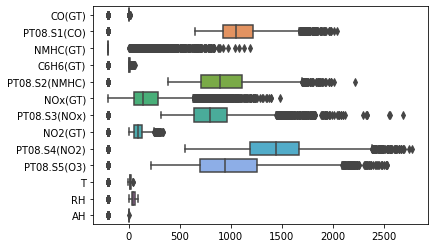

In [ ]:
quantitative_df = df.drop(['Date', 'Time'], axis = 1)
sns.boxplot(data = quantitative_df, orient = 'h')
print('BoxPlot до масштабирования:')

BoxPlot после масштабирования:


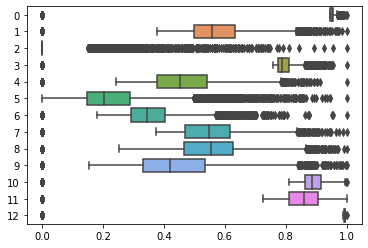

In [ ]:
# Выполняем нормализацию данных
scaler = MinMaxScaler()
scaler.fit(quantitative_df)
quantitative_df = scaler.transform(quantitative_df)

print('BoxPlot после масштабирования:')
sns.boxplot(data = quantitative_df, orient = 'h')

**4.Выполните замену категориальных признаков**

In [ ]:
label_encoder = LabelEncoder()
df['Date'] = pd.Series(label_encoder.fit_transform(df['Date']))
df['Time'] = pd.Series(label_encoder.fit_transform(df['Time']))
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,114,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,114,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,114,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,114,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,114,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,43,10,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,43,11,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,43,12,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,43,13,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


**5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;**

In [ ]:
corr_df = df.corr()
corr_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,1.000000,0.000806,-0.038054,0.015190,0.055764,0.035579,0.011858,0.004858,0.041003,0.027495,0.001698,-0.006620,0.032373,0.030117,0.037126
Time,0.000806,1.000000,0.075984,0.196780,0.049371,0.046087,0.282315,0.225153,-0.256172,0.219483,0.147978,0.198014,0.027230,-0.108776,-0.013763
CO(GT),-0.038054,0.075984,1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.015190,0.196780,0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.055764,0.049371,0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),0.035579,0.046087,-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.011858,0.282315,0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.004858,0.225153,0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),0.041003,-0.256172,-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.027495,0.219483,0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440


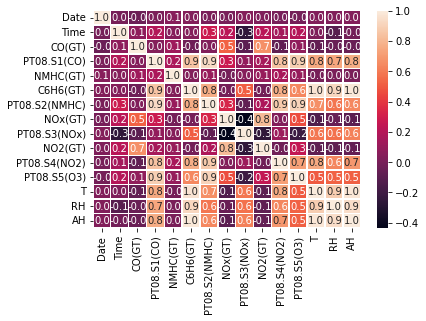

In [ ]:
sns.heatmap(corr_df, annot = True, fmt = '.1f', linewidths = .5)

**6.Заполните пропущенные значения в данных;**

In [ ]:
# поляучаем количество NaN вхождений в каждую колонку
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

В данном наборе данных нет пропущенных значений

**7.Решите поставленную задачу регрессии в соответствии с заданием**

Линейная регрессия, LASSO регуляризатор

In [ ]:
# Делим на тестову выборку и обучающую
quantitative_df = df.drop(['Date', 'Time'], axis = 1)
X_data, Y_data = quantitative_df.drop(columns='NO2(GT)', axis=1).values, quantitative_df['NO2(GT)']
# test_size показывает какой объем данных нужно выделить для тестового набора
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state = 150)

lasso = Lasso()
#подбор лучших параметров
params = {'alpha': np.arange(0.01, 1, 0.005)}
grid_search = GridSearchCV(lasso, params)
grid_search.fit(x_train, y_train)
best = grid_search.best_estimator_.alpha

lasso = Lasso(alpha=best)
lasso.fit(x_train,y_train)
predict_regulate = lasso.predict(x_test)
pearson, P_p_value = pearsonr(predict_regulate, y_test)
spearman, S_p_value = spearmanr(predict_regulate, y_test)
print("Spearman correlation: ", spearman)
print("Pearson correlation: ", pearson)

Spearman correlation:  0.8698869424231063
Pearson correlation:  0.8999289674292258


In [ ]:
X_data

array([[ 2.600e+00,  1.360e+03,  1.500e+02, ...,  1.360e+01,  4.890e+01,
         7.578e-01],
       [ 2.000e+00,  1.292e+03,  1.120e+02, ...,  1.330e+01,  4.770e+01,
         7.255e-01],
       [ 2.200e+00,  1.402e+03,  8.800e+01, ...,  1.190e+01,  5.400e+01,
         7.502e-01],
       ...,
       [ 2.400e+00,  1.142e+03, -2.000e+02, ...,  2.690e+01,  1.830e+01,
         6.406e-01],
       [ 2.100e+00,  1.003e+03, -2.000e+02, ...,  2.830e+01,  1.350e+01,
         5.139e-01],
       [ 2.200e+00,  1.071e+03, -2.000e+02, ...,  2.850e+01,  1.310e+01,
         5.028e-01]])

In [ ]:
# разница между реальными и предсказанными значениями
print(predict_regulate[:15] - y_test[:15])

213    -80.337233
5271    43.243061
1332   -60.648318
9264   -12.897602
4750     3.137173
6989   -53.484452
6085   -23.712521
1976   -38.880350
837     98.050692
4593    96.595252
3802    13.798677
130    -24.851336
8169    70.502273
6727   -10.499523
3646   -92.736242
Name: NO2(GT), dtype: float64


In [ ]:
#Линейная регрессия, RIDGE регуляризатор
reg = Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(x_train, y_train)
best_alpha = reg_grid.best_estimator_.alpha

reg = Ridge(alpha=best_alpha)
reg.fit(x_train,y_train)
pred_reg = reg.predict(x_test)

pearson, P_p_value = pearsonr(pred_reg, y_test)
spearman, S_p_value = spearmanr(pred_reg, y_test)

print('Spearman correlation: ', spearman)
print('Pearson correlation: ', pearson)

Spearman correlation:  0.8722506142436044
Pearson correlation:  0.9022304955448103
